# Import Libraries

In [1]:
#Basic python library which I need to import
import pandas as pd
import numpy as np
import os
import sys

#Library for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats
from fancyimpute import KNN 

#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
#Set working directory
os.chdir("C:\Python")

# Load data

In [3]:
# reading data into dataframe
credit= pd.read_csv("credit-card-data.csv")

# Exploratory Data Analysis

In [4]:
credit.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
# printing total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n",credit.nunique())


Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [7]:
credit.shape

(8950, 18)

In [8]:
credit.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

# Missing Value Analysis

In [9]:
# Find the total number of missing values in the dataframe
print ("Missing values :  ", credit.isnull().sum().values.sum())

Missing values :   314


In [10]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

#### Since there are missing values in the data, I need to impute/drop them.

In [11]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(credit.isnull().sum())

In [17]:
missing_val

Variables  Missing_percentage
0                   MINIMUM_PAYMENTS            3.497207
1                       CREDIT_LIMIT            0.011173
2                            CUST_ID            0.000000
3                            BALANCE            0.000000
4                   PRC_FULL_PAYMENT            0.000000
5                           PAYMENTS            0.000000
6                      PURCHASES_TRX            0.000000
7                   CASH_ADVANCE_TRX            0.000000
8             CASH_ADVANCE_FREQUENCY            0.000000
9   PURCHASES_INSTALLMENTS_FREQUENCY            0.000000
10        ONEOFF_PURCHASES_FREQUENCY            0.000000
11               PURCHASES_FREQUENCY            0.000000
12                      CASH_ADVANCE            0.000000
13            INSTALLMENTS_PURCHASES            0.000000
14                  ONEOFF_PURCHASES            0.000000
15                         PURCHASES            0.000000
16                 BALANCE_FREQUENCY            0.000000
17                            TENURE            0.000000

In [13]:
#Reset index
missing_val = missing_val.reset_index()

In [14]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [15]:
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(credit))*100

In [16]:
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#### After running the prev comman, go back to the 'missing_val' command to see the updated dataset

In [18]:
#save output results 
missing_val.to_csv("Miising_perc1.csv", index = False)

#### as the missing value is less than 30% in both the variables with NA, I can impute them; or I can drop them as well (as the missing value is less than 5%). However, I'm choosing to impute them in order to save the information

In [19]:
credit['MINIMUM_PAYMENTS']

0         139.509787
1        1072.340217
2         627.284787
3                NaN
4         244.791237
5        2407.246035
6         198.065894
7         532.033990
8         311.963409
9         100.302262
10       2172.697765
11        155.549069
12        490.207013
13        251.137986
14        989.962866
15       2109.906490
16        376.579631
17         73.203221
18        744.613395
19      12465.549380
20      13557.297260
21       1659.775075
22         86.329554
23       1425.426525
24       1657.002877
25        163.005536
26        971.183209
27        164.748819
28       1648.851345
29        159.684442
            ...     
8920      233.229870
8921       20.714869
8922       81.407073
8923      336.880119
8924       44.254787
8925       81.389378
8926       52.453011
8927       86.344733
8928       73.848755
8929             NaN
8930       89.753056
8931       89.496604
8932       86.564172
8933      337.294767
8934       65.936751
8935             NaN
8936       86

#### I'll assign NA to a known value & impute the NA using different methods, then I'll choose the best method

In [39]:
#create missing value
#credit['MINIMUM_PAYMENTS'].loc[4]
#credit['MINIMUM_PAYMENTS'].loc[4] = np.nan

244.79123700000002

#### actual value = 244.79123700000002
#### mean = 864.278267097266
#### median = 312.4522915
#### knn = 414.36229684705955

In [20]:
#mean method
#credit['MINIMUM_PAYMENTS'] = credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].mean())

In [ ]:
#after imputing with mean, I'm again loading the original data (with missing values) from "LOAD DATA"

In [26]:
#median method
#credit['MINIMUM_PAYMENTS'] = credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median())

In [ ]:
#after imputing with median, I'm again loading the original data (with missing values) from "LOAD DATA"

In [59]:
#KNN imputation
#Assigning levels to the categories
#lis = []
#for i in range(0, credit.shape[1]):
    #print(i)
    #if(credit.iloc[:,i].dtypes == 'object'):
        #credit.iloc[:,i] = pd.Categorical(credit.iloc[:,i])
        #print(credit[[i]])
        #credit.iloc[:,i] = credit.iloc[:,i].cat.codes 
        #credit.iloc[:,i] = credit.iloc[:,i].astype('object')
        
        #lis.append(credit.columns[i])

In [60]:
#Apply KNN imputation algorithm
#credit = pd.DataFrame(KNN(k = 3).fit_transform(credit), columns = credit.columns)

Imputing row 1/8950 with 0 missing, elapsed time: 16.049
Imputing row 101/8950 with 0 missing, elapsed time: 16.083
Imputing row 201/8950 with 0 missing, elapsed time: 16.084
Imputing row 301/8950 with 0 missing, elapsed time: 16.085
Imputing row 401/8950 with 0 missing, elapsed time: 16.086
Imputing row 501/8950 with 0 missing, elapsed time: 16.087
Imputing row 601/8950 with 0 missing, elapsed time: 16.087
Imputing row 701/8950 with 0 missing, elapsed time: 16.087
Imputing row 801/8950 with 0 missing, elapsed time: 16.088
Imputing row 901/8950 with 0 missing, elapsed time: 16.090
Imputing row 1001/8950 with 0 missing, elapsed time: 16.091
Imputing row 1101/8950 with 0 missing, elapsed time: 16.092
Imputing row 1201/8950 with 0 missing, elapsed time: 16.093
Imputing row 1301/8950 with 0 missing, elapsed time: 16.094
Imputing row 1401/8950 with 0 missing, elapsed time: 16.094
Imputing row 1501/8950 with 0 missing, elapsed time: 16.095
Imputing row 1601/8950 with 0 missing, elapsed time:

In [ ]:
#after imputing with knn, I'm again loading the original data (with missing values) from "LOAD DATA"

#### as the median imputation method predicted value is closest to the actual value, I'm choosing median for Missing value analysis

#### But, we've to remember, that as the mean & median are constants for any given column, & knn will vary with different datapoints...I can get different best methods if I take another known value for method selection

In [20]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so I need to remove with median.

credit['CREDIT_LIMIT'] = credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median())
credit['MINIMUM_PAYMENTS'] = credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median())

In [21]:
# Now again check the missing values.

credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

# Deriving New KPIs

## 1. Monthly average purchase and cash advance amount

### Monthly_avg_purchase

In [22]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

In [23]:
credit['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

### Monthly_cash_advance Amount

In [24]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [25]:
credit['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

## 2. Purchases by type (one-off, installments)

##### To find what type of purchases customers are making on their credit card

In [26]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0                 0.00                   95.40
1                 0.00                    0.00
2               773.17                    0.00
3              1499.00                    0.00
4                16.00                    0.00
5                 0.00                 1333.28
6              6402.63                  688.38
7                 0.00                  436.20
8               661.49                  200.00
9              1281.60                    0.00
10                0.00                  920.12
11             1492.18                    0.00
12             2500.23                  717.76
13              419.96                 1717.97
14                0.00                    0.00
15                0.00                 1611.70
16                0.00                    0.00
17                0.00                  519.00
18              166.00                  338.35
19                0.00                  398.64
20                0.00                  176.68
21             5910.04                  449.91
22                0.00                  815.90
23             3454.56                  793.79
24                0.00                    0.00
25                0.00                  399.60
26              102.00                    0.00
27                0.00                  233.28
28              204.55                  182.50
29                0.00                  100.00
...                ...                     ...
8920              0.00                    0.00
8921              0.00                   57.42
8922              0.00                  145.98
8923            939.09                  959.79
8924             74.00                    0.00
8925              0.00                  418.59
8926              0.00                  580.00
8927            147.80                  167.40
8928              0.00                  500.00
8929              0.00                    0.00
8930              0.00                   84.00
8931              0.00                  235.80
8932              0.00                  180.00
8933            255.62                  363.98
8934              0.00                  110.50
8935              0.00                  465.90
8936              0.00                  712.50
8937              0.00                    0.00
8938              0.00                    0.00
8939            734.40                    0.00
8940              0.00                  591.24
8941              0.00                  214.55
8942              0.00                  113.28
8943             20.90                    0.00
8944           1012.73                    0.00
8945              0.00                  291.12
8946              0.00                  300.00
8947              0.00                  144.40
8948              0.00                    0.00
8949           1093.25                    0.00

[8950 rows x 2 columns]

#### Customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [27]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [28]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [29]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [30]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

#### As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour

In [31]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [32]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [33]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [34]:
credit.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000        312.343947          0.000000      12   
4   678.334763        244.791237          0.000000      12   

   Monthly_avg_purchase  Monthly_cash_advance purchase_type  
0              7.950000              0.000000   installment  
1              0.000000            536.912124          none  
2             64.430833              0.000000       one_off  
3            124.916667             17.149001       one_off  
4              1.333333              0.000000       one_off

## 4. Limit_usage (balance to credit limit ratio ) credit card utilization

#### lower value implies lower balance remaining in the card, which in turn means that customers are spending more

In [35]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [36]:
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

## 5- Payments to minimum payments ratio etc.

In [37]:
credit['payment_minpayment_ratio']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [38]:
credit['payment_minpayment_ratio']

0        1.446508
1        3.826241
2        0.991682
3        0.000000
4        2.771075
5        0.581601
6       32.081820
7        1.276357
8        2.206280
9       11.612605
10       0.498597
11       4.536309
12       1.240830
13       6.593552
14       0.813816
15       0.944800
16       1.040881
17       3.477861
18       2.311048
19       0.084551
20       0.016454
21       1.251952
22      27.332818
23       6.649970
24       0.858615
25       1.320852
26       0.916592
27       1.261155
28       0.971251
29       1.006784
          ...    
8920     0.234940
8921     3.304997
8922     0.659354
8923     1.985987
8924     4.856447
8925     5.191574
8926    12.226247
8927     2.678503
8928     6.184871
8929     0.000000
8930     1.385733
8931     2.112821
8932     1.596541
8933     0.314676
8934     2.448965
8935     0.000000
8936     6.972789
8937     1.936734
8938    64.055621
8939     0.653714
8940     5.745025
8941     1.120950
8942     1.095102
8943     1.348973
8944     0

# Insights from KPIs

#### Average payment_minpayment ratio for each purchse type

In [39]:
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpayment_ratio']))
type(x)
x.values

array([ 7.237, 13.259, 10.087,  5.571])

Text(0.5, 1.0, 'Mean Payment_minpayment ratio for each purchse type')

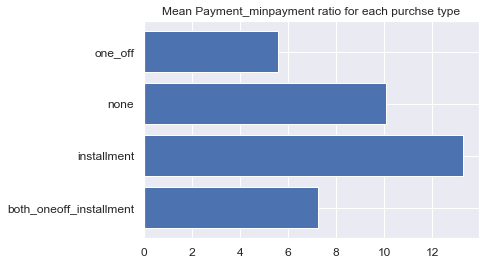

In [40]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean Payment_minpayment ratio for each purchse type')

#### Insight 1: customers with installment purchases are paying more dues compared to other groups

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type')

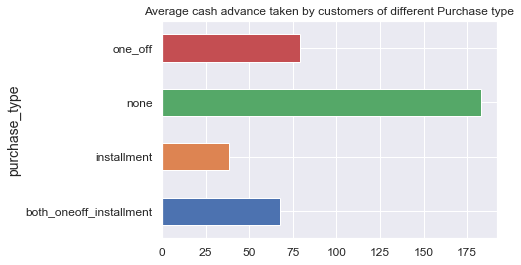

In [41]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type')

#### Insight 2: Customers who don't do either one-off or installment purchases, take more cash on advance

Text(0.5, 1.0, 'Limit Usage by customers of different Purchase type : Both, None,Installment,One_Off')

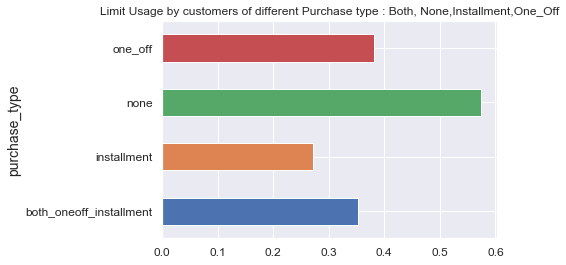

In [42]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()
plt.title('Limit Usage by customers of different Purchase type : Both, None,Installment,One_Off')

#### Insight 3: Customers who do installment purchases, spend more on their credit card

Text(0.5, 1.0, 'Monthly Avg Purchase by customers of different Purchase type : Both, None,Installment,One_Off')

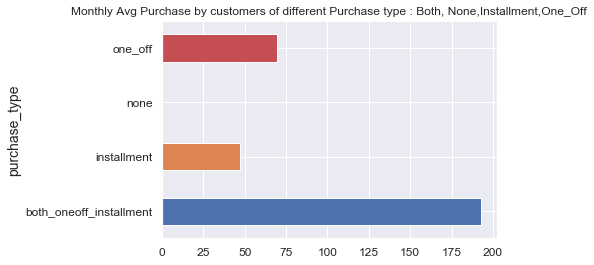

In [43]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_avg_purchase'])).plot.barh()
plt.title('Monthly Avg Purchase by customers of different Purchase type : Both, None,Installment,One_Off')

#### Insight 4: Customers who do installment purchases, do less purchase than others

# Outlier Analysis

In [44]:
credit.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000        312.343947          0.000000      12   
4   678.334763        244.791237          0.000000      12   

   Monthly_avg_purchase  Monthly_cash_advance purchase_type  limit_usage  \
0              7.950000              0.000000   installment     0.040901   
1              0.000000            536.912124          none     0.457495   
2             64.430833              0.000000       one_off     0.332687   
3            124.916667             17.149001       one_off     0.222223   
4              1.333333              0.000000       one_off     0.681429   

   payment_minpayment_ratio  
0                  1.446508  
1                  3.826241  
2                  0.991682  
3                  0.000000  
4                  2.771075

In [45]:
cr_num=credit.drop(['CUST_ID','purchase_type'],axis=1)

In [46]:
cr_num.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000        312.343947          0.000000      12   
4   678.334763        244.791237          0.000000      12   

   Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0              7.950000              0.000000     0.040901   
1              0.000000            536.912124     0.457495   
2             64.430833              0.000000     0.332687   
3            124.916667             17.149001     0.222223   
4              1.333333              0.000000     0.681429   

   payment_minpayment_ratio  
0                  1.446508  
1                  3.826241  
2                  0.991682  
3                  0.000000  
4                  2.771075

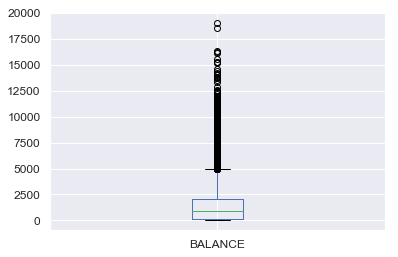

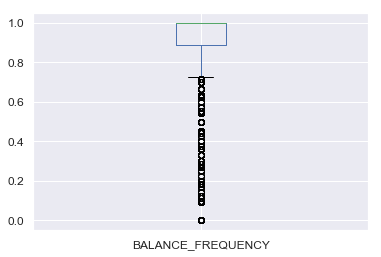

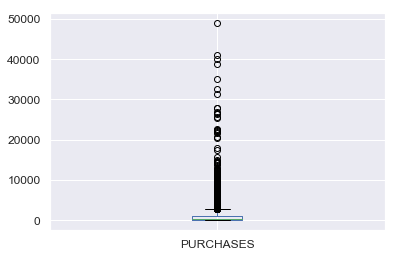

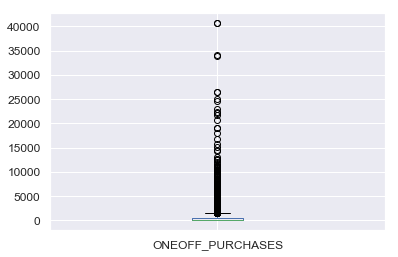

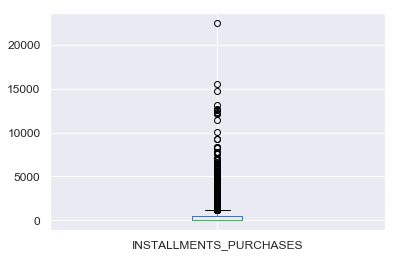

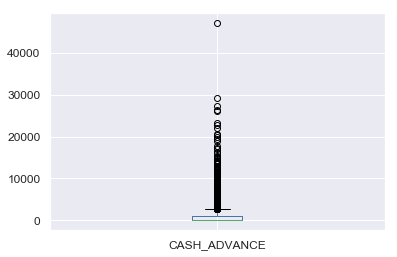

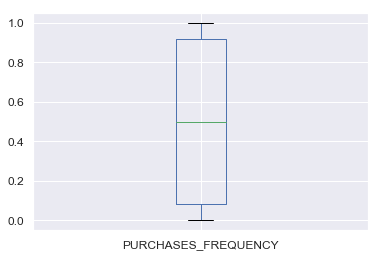

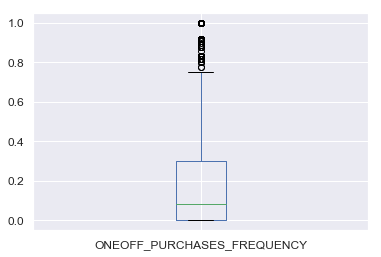

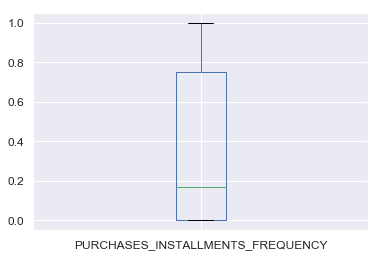

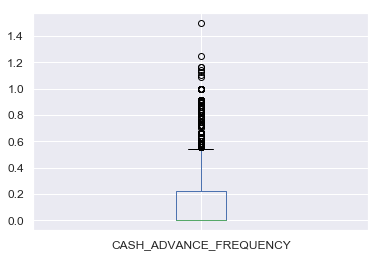

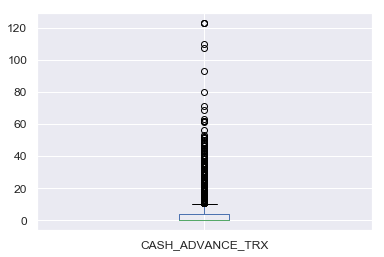

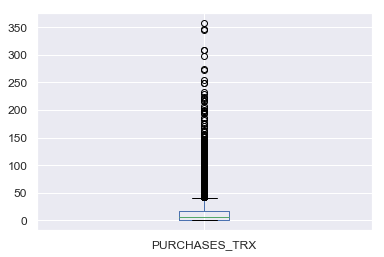

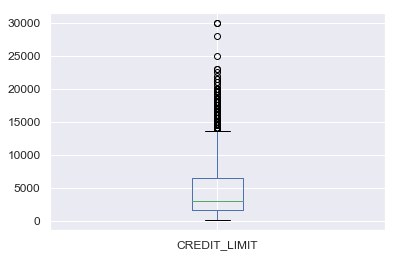

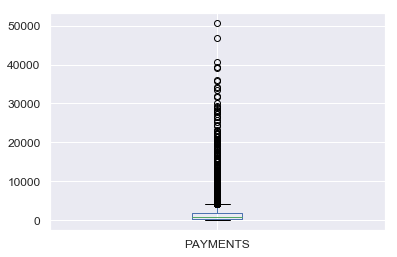

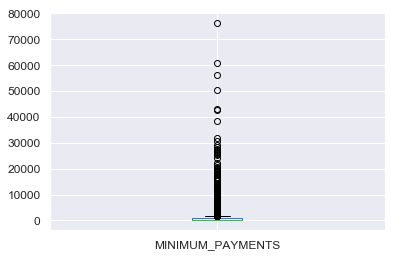

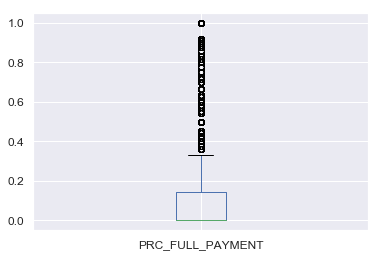

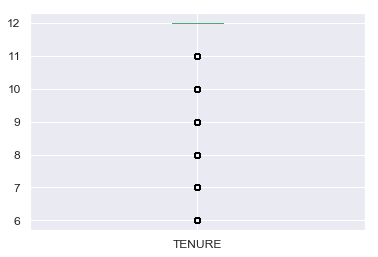

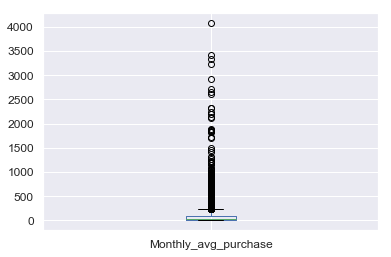

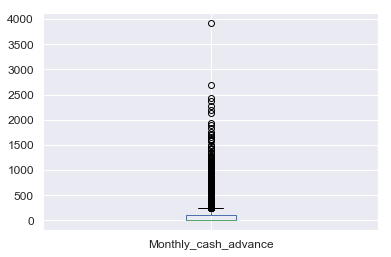

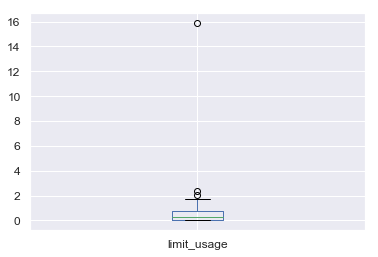

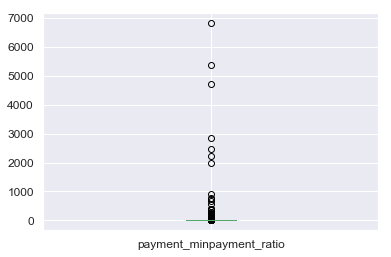

In [47]:
for i in cr_num.columns:
    cr_num.boxplot(column=i)
    plt.show()

#### Since there are variables having extreme values so I'll have to remove the outlier effect

#### I can replace the outliers with NAs & do missing value analysis, but I'm not doing that in order to save the authenticity of the information

#### I'm doing log transformation to get rid of the extreme values

In [48]:
# log tranformation
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [49]:
cr_log.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      6.161637           0.619940     4.899647          3.204274   
std       2.013303           0.148590     2.916872          3.246365   
min       0.000000           0.000000     0.000000          0.000000   
25%       4.861995           0.635989     3.704627          0.000000   
50%       6.773521           0.693147     5.892417          3.663562   
75%       7.628099           0.693147     7.013133          6.360274   
max       9.854515           0.693147    10.800403         10.615512   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean                 3.352403      3.319086             0.361268   
std                  3.082973      3.566298             0.277317   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.080042   
50%                  4.499810      0.000000             0.405465   
75%                  6.151961      7.016449             0.650588   
max                 10.021315     10.760839             0.693147   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.158699                          0.270072   
std                      0.216672                          0.281852   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.080042                          0.154151   
75%                      0.262364                          0.559616   
max                      0.693147                          0.693147   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.113512          0.817570       1.894731      8.094825   
std                  0.156716          1.009316       1.373856      0.819629   
min                  0.000000          0.000000       0.000000      3.931826   
25%                  0.000000          0.000000       0.693147      7.378384   
50%                  0.000000          0.000000       2.079442      8.006701   
75%                  0.200671          1.609438       2.890372      8.779711   
max                  0.916291          4.820282       5.883322     10.308986   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count  8950.000000       8950.000000       8950.000000  8950.000000   
mean      6.624540          5.916079          0.117730     2.519680   
std       1.591763          1.169929          0.211617     0.130367   
min       0.000000          0.018982          0.000000     1.945910   
25%       5.951361          5.146667          0.000000     2.564949   
50%       6.754489          5.747301          0.000000     2.564949   
75%       7.550732          6.671670          0.133531     2.564949   
max      10.834125         11.243832          0.693147     2.564949   

       Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
count           8950.000000           8950.000000  8950.000000   
mean               3.050877              2.163970     0.296081   
std                2.002823              2.429741     0.250303   
min                0.000000              0.000000     0.000000   
25%                1.481458              0.000000     0.040656   
50%                3.494587              0.000000     0.264455   
75%                4.587295              4.606022     0.540911   
max                8.315721              8.276166     2.827902   

       payment_minpayment_ratio  
count               8950.000000  
mean                   1.357600  
std                    0.940149  
min              

# Data Preparation for Machine Learning Algorithm

#### Here, I'll exclude those variables from cr_log, which have been used to derive KPIs, apart from ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES, as these 2 variables don't have a linear relation with their derived KPI, purchase_type

In [50]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','CREDIT_LIMIT']

In [51]:
#I'm saving the remaining variables for further use
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [52]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpayment_ratio'],
      dtype='object')

#### Original dataset with categorical column converted to number type

In [53]:
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

In [54]:
cre_original.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000        312.343947          0.000000      12   
4   678.334763        244.791237          0.000000      12   

   Monthly_avg_purchase  Monthly_cash_advance purchase_type  limit_usage  \
0              7.950000              0.000000   installment     0.040901   
1              0.000000            536.912124          none     0.457495   
2             64.430833              0.000000       one_off     0.332687   
3            124.916667             17.149001       one_off     0.222223   
4              1.333333              0.000000       one_off     0.681429   

   payment_minpayment_ratio  both_oneoff_installment  installment  none  \
0                  1.446508                        0            1     0   
1                  3.826241                        0            0     1   
2                  0.991682                        0            0     0   
3                  0.000000                        0            0     0   
4                  2.771075                        0            0     0   

   one_off  
0        0  
1        0  
2        1  
3        1  
4        1

In [55]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

#### I have some categorical data which need to convert with the help of dummy creation

In [56]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

both_oneoff_installment  installment  none  one_off
0                           0            1     0        0
1                           0            0     1        0
2                           0            0     0        1
3                           0            0     0        1
4                           0            0     0        1
5                           0            1     0        0
6                           1            0     0        0
7                           0            1     0        0
8                           1            0     0        0
9                           0            0     0        1
10                          0            1     0        0
11                          0            0     0        1
12                          1            0     0        0
13                          1            0     0        0
14                          0            0     1        0
15                          0            1     0        0
16                          0            0     1        0
17                          0            1     0        0
18                          1            0     0        0
19                          0            1     0        0
20                          0            1     0        0
21                          1            0     0        0
22                          0            1     0        0
23                          1            0     0        0
24                          0            0     1        0
25                          0            1     0        0
26                          0            0     0        1
27                          0            1     0        0
28                          1            0     0        0
29                          0            1     0        0
...                       ...          ...   ...      ...
8920                        0            0     1        0
8921                        0            1     0        0
8922                        0            1     0        0
8923                        1            0     0        0
8924                        0            0     0        1
8925                        0            1     0        0
8926                        0            1     0        0
8927                        1            0     0        0
8928                        0            1     0        0
8929                        0            0     1        0
8930                        0            1     0        0
8931                        0            1     0        0
8932                        0            1     0        0
8933                        1            0     0        0
8934                        0            1     0        0
8935                        0            1     0        0
8936                        0            1     0        0
8937                        0            0     1        0
8938                        0            0     1        0
8939                        0            0     0        1
8940                        0            1     0        0
8941                        0            1     0        0
8942                        0            1     0        0
8943                        0            0     0        1
8944                        0            0     0        1
8945                        0            1     0        0
8946                        0            1     0        0
8947                        0            1     0        0
8948                        0            0     1        0
8949                        0            0     0        1

[8950 rows x 4 columns]

#### Now merge the created dummy with the original data frame

In [57]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [58]:
l=['purchase_type']

In [59]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
PRC_FULL_PAYMENT                    False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpayment_ratio            False
both_oneoff_installment             False
installment                         False
none                                False
one_off                             False
dtype: bool

In [60]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
BALANCE_FREQUENCY                   8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
PRC_FULL_PAYMENT                    8950 non-null float64
Monthly_avg_purchase                8950 non-null float64
Monthly_cash_advance                8950 non-null float64
limit_usage                         8950 non-null float64
payment_minpayment_ratio            8950 non-null float64
both_oneoff_installment             8950 non-null uint8
installment              

In [61]:
cr_dummy.describe()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count        8950.000000       8950.000000             8950.000000   
mean            0.619940          3.204274                3.352403   
std             0.148590          3.246365                3.082973   
min             0.000000          0.000000                0.000000   
25%             0.635989          0.000000                0.000000   
50%             0.693147          3.663562                4.499810   
75%             0.693147          6.360274                6.151961   
max             0.693147         10.615512               10.021315   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8950.000000                 8950.000000   
mean              0.361268                    0.158699   
std               0.277317                    0.216672   
min               0.000000                    0.000000   
25%               0.080042                    0.000000   
50%               0.405465                    0.080042   
75%               0.650588                    0.262364   
max               0.693147                    0.693147   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8950.000000             8950.000000   
mean                           0.270072                0.113512   
std                            0.281852                0.156716   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.154151                0.000000   
75%                            0.559616                0.200671   
max                            0.693147                0.916291   

       CASH_ADVANCE_TRX  PURCHASES_TRX  PRC_FULL_PAYMENT  \
count       8950.000000    8950.000000       8950.000000   
mean           0.817570       1.894731          0.117730   
std            1.009316       1.373856          0.211617   
min            0.000000       0.000000          0.000000   
25%            0.000000       0.693147          0.000000   
50%            0.000000       2.079442          0.000000   
75%            1.609438       2.890372          0.133531   
max            4.820282       5.883322          0.693147   

       Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
count           8950.000000           8950.000000  8950.000000   
mean               3.050877              2.163970     0.296081   
std                2.002823              2.429741     0.250303   
min                0.000000              0.000000     0.000000   
25%                1.481458              0.000000     0.040656   
50%                3.494587              0.000000     0.264455   
75%                4.587295              4.606022     0.540911   
max                8.315721              8.276166     2.827902   

       payment_minpayment_ratio  both_oneoff_installment  installment  \
count               8950.000000              8950.000000  8950.000000   
mean                   1.357600                 0.309944     0.252514   
std                    0.940149                 0.462496     0.434479   
min                    0.000000                 0.000000     0.000000   
25%                    0.648817                 0.000000     0.000000   
50%                    1.109459                 0.000000     0.000000   
75%                    1.953415                 1.000000     1.000000   
max                    8.830767                 1.000000     1.000000   

              none      one_off  
count  8950.000000  8950.000000  
mean      0.228156     0.209385  
std       0.419667     0.406893  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

# Correlation Analysis

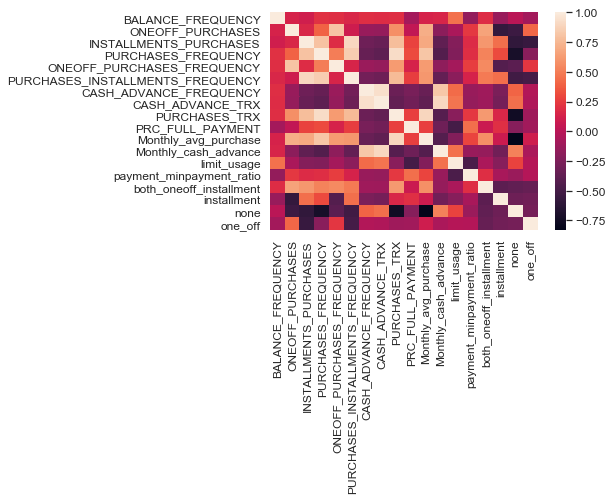

In [62]:
sns.heatmap(cr_dummy.corr())

#### Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data

# Dimension reduction using PCA

#### I'll standardize the data to put the data on the same scale & so that the data has zero mean & unit variance, which is important for the optimal performance of PCA

In [63]:
from sklearn.preprocessing import  StandardScaler

In [64]:
sc=StandardScaler()

In [65]:
cr_dummy.shape

(8950, 18)

In [66]:
cr_dummy.describe()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count        8950.000000       8950.000000             8950.000000   
mean            0.619940          3.204274                3.352403   
std             0.148590          3.246365                3.082973   
min             0.000000          0.000000                0.000000   
25%             0.635989          0.000000                0.000000   
50%             0.693147          3.663562                4.499810   
75%             0.693147          6.360274                6.151961   
max             0.693147         10.615512               10.021315   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8950.000000                 8950.000000   
mean              0.361268                    0.158699   
std               0.277317                    0.216672   
min               0.000000                    0.000000   
25%               0.080042                    0.000000   
50%               0.405465                    0.080042   
75%               0.650588                    0.262364   
max               0.693147                    0.693147   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8950.000000             8950.000000   
mean                           0.270072                0.113512   
std                            0.281852                0.156716   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.154151                0.000000   
75%                            0.559616                0.200671   
max                            0.693147                0.916291   

       CASH_ADVANCE_TRX  PURCHASES_TRX  PRC_FULL_PAYMENT  \
count       8950.000000    8950.000000       8950.000000   
mean           0.817570       1.894731          0.117730   
std            1.009316       1.373856          0.211617   
min            0.000000       0.000000          0.000000   
25%            0.000000       0.693147          0.000000   
50%            0.000000       2.079442          0.000000   
75%            1.609438       2.890372          0.133531   
max            4.820282       5.883322          0.693147   

       Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
count           8950.000000           8950.000000  8950.000000   
mean               3.050877              2.163970     0.296081   
std                2.002823              2.429741     0.250303   
min                0.000000              0.000000     0.000000   
25%                1.481458              0.000000     0.040656   
50%                3.494587              0.000000     0.264455   
75%                4.587295              4.606022     0.540911   
max                8.315721              8.276166     2.827902   

       payment_minpayment_ratio  both_oneoff_installment  installment  \
count               8950.000000              8950.000000  8950.000000   
mean                   1.357600                 0.309944     0.252514   
std                    0.940149                 0.462496     0.434479   
min                    0.000000                 0.000000     0.000000   
25%                    0.648817                 0.000000     0.000000   
50%                    1.109459                 0.000000     0.000000   
75%                    1.953415                 1.000000     1.000000   
max                    8.830767                 1.000000     1.000000   

              none      one_off  
count  8950.000000  8950.000000  
mean      0.228156     0.209385  
std       0.419667     0.406893  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

In [67]:
cr_scaled=sc.fit_transform(cr_dummy)

In [68]:
cr_scaled

array([[-1.488e-01, -9.871e-01,  3.945e-01, -7.469e-01, -7.325e-01,
        -6.743e-01, -7.244e-01, -8.101e-01, -5.795e-01, -5.564e-01,
        -4.290e-01, -8.907e-01, -1.023e+00, -4.924e-01, -6.702e-01,
         1.721e+00, -5.437e-01, -5.146e-01],
       [ 1.796e-01, -9.871e-01, -1.087e+00, -1.303e+00, -7.325e-01,
        -9.583e-01,  6.996e-01,  7.846e-01, -1.379e+00,  3.920e-01,
        -1.523e+00,  1.697e+00,  3.222e-01,  2.303e-01, -6.702e-01,
        -5.812e-01,  1.839e+00, -5.146e-01],
       [ 4.927e-01,  1.062e+00, -1.087e+00,  1.197e+00,  2.467e+00,
        -9.583e-01, -7.244e-01, -8.101e-01,  4.879e-01, -5.564e-01,
         5.643e-01, -8.907e-01, -3.550e-02, -7.112e-01, -6.702e-01,
        -5.812e-01, -5.437e-01,  1.943e+00],
       [-8.579e-01,  1.266e+00, -1.087e+00, -1.014e+00, -3.630e-01,
        -9.583e-01, -2.136e-01, -1.233e-01, -8.747e-01, -5.564e-01,
         8.912e-01,  3.024e-01, -3.812e-01, -1.444e+00, -6.702e-01,
        -5.812e-01, -5.437e-01,  1.943e+00],
    

In [69]:
cr_scaled.shape

(8950, 18)

# PCA

#### I'll reduce features using principal component analysis

In [70]:
from sklearn.decomposition import PCA

In [71]:
cr_dummy.shape

(8950, 18)

In [72]:
#We have 18 features so our n_component will be 18.
pc=PCA(n_components=18)
cr_pca=pc.fit(cr_scaled)

In [73]:
cr_pca

PCA(n_components=18)

In [74]:
#Lets check if we take 18 component then how much varience it explains. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

1.0

In [75]:
var_ratio={}
for n in range(2,19):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [76]:
var_ratio

{2: 0.5618818632071954,
 3: 0.701709194660248,
 4: 0.7879215579897088,
 5: 0.8509051128049885,
 6: 0.8981298669161923,
 7: 0.9250500263596615,
 8: 0.9449979758778908,
 9: 0.9638401466961727,
 10: 0.9754835332904715,
 11: 0.9845448913362707,
 12: 0.9903259946876038,
 13: 0.9931878396175069,
 14: 0.9956733236487906,
 15: 0.9980917440976622,
 16: 0.9996566575330126,
 17: 1.0,
 18: 1.0}

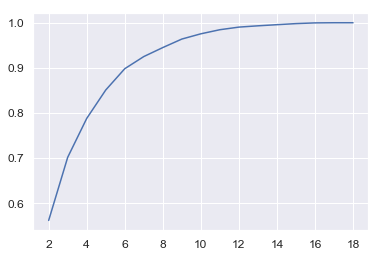

In [77]:
pd.Series(var_ratio).plot()

#### since 6 components are explaining more than 90% of variance, I select 6 components

In [78]:
pc=PCA(n_components=6)

In [79]:
p=pc.fit(cr_scaled)

In [80]:
cr_scaled.shape

(8950, 18)

In [81]:
p.explained_variance_

array([6.982, 3.133, 2.517, 1.552, 1.134, 0.85 ])

In [82]:
np.sum(p.explained_variance_)

16.16814410103905

In [83]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [84]:
pc_final

PCA(n_components=6)

In [85]:
reduced_cr

array([[-2.867e-01, -2.636e+00,  1.341e-01, -8.753e-01, -8.049e-02,
         3.356e-01],
       [-3.859e+00, -1.023e-01, -3.984e-01,  1.422e+00, -4.089e-01,
        -7.381e-01],
       [ 1.164e+00,  1.568e+00,  2.671e+00, -1.924e+00,  3.679e-01,
        -7.876e-01],
       [-1.135e+00,  6.658e-01,  2.456e+00, -1.469e+00,  8.164e-01,
         1.068e+00],
       [-1.521e+00, -1.807e-01,  2.201e+00, -1.748e+00, -2.411e-01,
        -8.049e-01],
       [ 1.064e+00, -1.639e+00, -1.751e+00, -2.385e+00,  1.053e-01,
        -2.753e-01],
       [ 5.102e+00,  1.217e+00,  7.774e-01,  2.561e+00, -3.389e-01,
        -1.529e+00],
       [ 1.444e+00, -1.829e+00, -1.894e+00, -2.015e+00,  2.153e-01,
        -3.441e-01],
       [ 1.418e+00,  3.226e-01,  4.284e-01, -3.527e-01, -1.618e+00,
         5.152e-01],
       [ 1.766e-01, -1.186e-01,  3.693e+00, -2.299e-02,  5.919e-01,
         7.709e-01],
       [ 1.495e+00, -1.636e+00, -2.179e+00, -2.503e+00,  1.821e-01,
        -3.125e-01],
       [ 2.588e-01,  

In [86]:
dd=pd.DataFrame(reduced_cr)

In [87]:
dd.head()

0         1         2         3         4         5
0 -0.286672 -2.636484  0.134143 -0.875332 -0.080491  0.335649
1 -3.859047 -0.102302 -0.398406  1.422064 -0.408851 -0.738090
2  1.164233  1.568055  2.671075 -1.924379  0.367884 -0.787556
3 -1.135469  0.665804  2.455836 -1.469237  0.816375  1.067669
4 -1.520933 -0.180685  2.200903 -1.748383 -0.241108 -0.804905

In [88]:
dd.shape

(8950, 6)

#### So initially I had 18 variables, now I have 6 variables

In [89]:
col_list=cr_dummy.columns

In [90]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpayment_ratio', 'both_oneoff_installment', 'installment',
       'none', 'one_off'],
      dtype='object')

In [91]:
pc_final.components_.T

array([[ 0.024,  0.25 , -0.252, -0.216, -0.07 , -0.742],
       [ 0.206,  0.402,  0.255, -0.009, -0.033,  0.097],
       [ 0.308, -0.072, -0.324,  0.052, -0.037,  0.138],
       [ 0.341,  0.036, -0.167, -0.051,  0.132, -0.058],
       [ 0.209,  0.355,  0.181,  0.056, -0.041, -0.107],
       [ 0.292, -0.085, -0.34 ,  0.008,  0.012,  0.044],
       [-0.215,  0.277, -0.252,  0.189,  0.341,  0.095],
       [-0.23 ,  0.283, -0.258,  0.191,  0.312,  0.105],
       [ 0.349,  0.124, -0.103, -0.043,  0.109,  0.012],
       [ 0.156, -0.165,  0.084,  0.417,  0.159, -0.495],
       [ 0.339,  0.154,  0.025, -0.063,  0.196,  0.052],
       [-0.245,  0.255, -0.232,  0.202,  0.24 ,  0.105],
       [-0.156,  0.256, -0.249, -0.373, -0.079, -0.145],
       [ 0.127, -0.007,  0.156,  0.58 ,  0.112, -0.144],
       [ 0.233,  0.284, -0.119,  0.171, -0.403,  0.223],
       [ 0.086, -0.423, -0.236, -0.156,  0.375, -0.012],
       [-0.304, -0.022, -0.085,  0.229, -0.355, -0.173],
       [-0.043,  0.151,  0.475,

In [92]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

PC_0      PC_1      PC_2      PC_3  \
BALANCE_FREQUENCY                 0.024450  0.250394 -0.251614 -0.216346   
ONEOFF_PURCHASES                  0.205671  0.401602  0.254974 -0.009282   
INSTALLMENTS_PURCHASES            0.308126 -0.072228 -0.324049  0.051756   
PURCHASES_FREQUENCY               0.340926  0.035511 -0.166885 -0.050828   
ONEOFF_PURCHASES_FREQUENCY        0.208843  0.355111  0.181378  0.055980   
PURCHASES_INSTALLMENTS_FREQUENCY  0.291682 -0.084972 -0.339519  0.008276   
CASH_ADVANCE_FREQUENCY           -0.215303  0.277126 -0.251975  0.188698   
CASH_ADVANCE_TRX                 -0.230472  0.282639 -0.258176  0.190852   
PURCHASES_TRX                     0.348823  0.124373 -0.103116 -0.043125   
PRC_FULL_PAYMENT                  0.155567 -0.164531  0.083664  0.417487   
Monthly_avg_purchase              0.339488  0.153725  0.024724 -0.062928   
Monthly_cash_advance             -0.244587  0.254845 -0.232299  0.202425   
limit_usage                      -0.155552  0.255661 -0.248812 -0.372962   
payment_minpayment_ratio          0.127212 -0.007366  0.155776  0.580183   
both_oneoff_installment           0.233314  0.284213 -0.119155  0.171228   
installment                       0.086371 -0.422908 -0.235537 -0.156302   
none                             -0.304373 -0.022059 -0.084969  0.228965   
one_off                          -0.043494  0.151279  0.474581 -0.263881   

                                      PC_4      PC_5  
BALANCE_FREQUENCY                -0.070320 -0.741879  
ONEOFF_PURCHASES                 -0.032601  0.096927  
INSTALLMENTS_PURCHASES           -0.037070  0.138481  
PURCHASES_FREQUENCY               0.131794 -0.058496  
ONEOFF_PURCHASES_FREQUENCY       -0.041200 -0.106769  
PURCHASES_INSTALLMENTS_FREQUENCY  0.011950  0.043739  
CASH_ADVANCE_FREQUENCY            0.341190  0.094595  
CASH_ADVANCE_TRX                  0.311914  0.105323  
PURCHASES_TRX                     0.109152  0.012056  
PRC_FULL_PAYMENT                  0.158733 -0.494843  
Monthly_avg_purchase              0.196232  0.051676  
Monthly_cash_advance              0.239541  0.104825  
limit_usage                      -0.078695 -0.144532  
payment_minpayment_ratio          0.111795 -0.144499  
both_oneoff_installment          -0.402716  0.223256  
installment                       0.375495 -0.011986  
none                             -0.354961 -0.172994  
one_off                           0.422901 -0.062541

#### This data gives us eigen vector for each component

In [93]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.387865
PC_1    0.174017
PC_2    0.139827
PC_3    0.086212
PC_4    0.062984
PC_5    0.047225
dtype: float64

In [94]:
type(cr_pca)

sklearn.decomposition._pca.PCA

# Clustering

In [95]:
from sklearn.cluster import KMeans

In [96]:
##Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(reduced_cr)
    cluster_errors.append(clusters.inertia_)

In [97]:
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [98]:
clusters_df.head()

num_clusters  cluster_errors
0             1   144688.721560
1             2    97352.812441
2             3    74768.350308
3             4    53700.014362
4             5    46454.585899

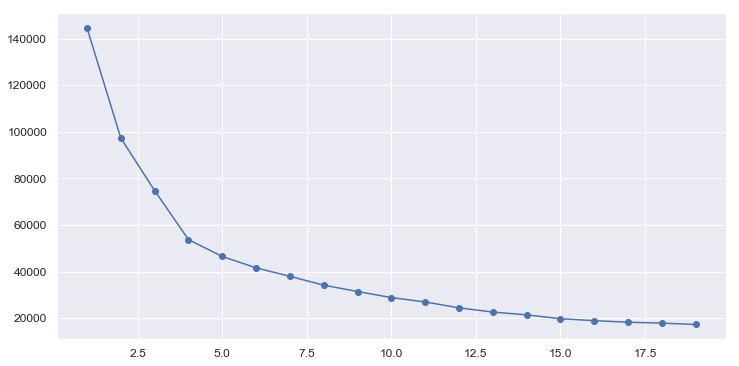

In [99]:
#Plotting line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### From the graph, I get the elbow range (3,4,5)....I'm specifying no. of clusters as 4

In [100]:
km_4=KMeans(n_clusters=4,random_state=123)

In [101]:
km_4.fit(reduced_cr)

KMeans(n_clusters=4, random_state=123)

In [102]:
km_4

KMeans(n_clusters=4, random_state=123)

In [103]:
km_4.labels_

array([3, 2, 0, 0, 0, 3, 1, 3, 1, 0, 3, 0, 1, 1, 2, 3, 2, 3, 1, 3, 3, 1,
       3, 1, 2, 3, 0, 3, 1, 3, 1, 1, 0, 0, 3, 2, 2, 1, 0, 0, 2, 1, 0, 2,
       1, 1, 3, 2, 1, 0, 1, 1, 2, 0, 3, 0, 0, 1, 2, 3, 0, 0, 2, 0, 3, 1,
       2, 2, 1, 0, 3, 1, 2, 1, 1, 1, 0, 3, 2, 0, 1, 2, 1, 3, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 3, 2, 0, 3, 1, 3, 2, 0, 3, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 3, 2, 3, 2, 1, 0, 3, 2, 2, 0, 2, 1, 0, 2, 0, 1,
       3, 0, 3, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 3, 0, 1, 1, 3, 1, 3, 1,
       1, 3, 1, 2, 1, 0, 2, 2, 1, 1, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 2,
       0, 2, 1, 3, 1, 3, 2, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1,
       0, 2, 0, 1, 3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 2, 0, 3, 3, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 3, 0, 0, 1, 0, 3, 1, 3, 1, 0, 1,
       1, 0, 1, 3, 1, 3, 3, 1, 0, 3, 3, 0, 2, 3, 0, 1, 3, 2, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 1, 3, 1, 1, 2, 2,
       2, 1, 0, 2, 1, 1, 0, 2, 3, 1, 0, 2, 0, 0, 0,

In [104]:
pd.Series(km_4.labels_).value_counts()

1    2764
3    2215
2    2101
0    1870
dtype: int64

# Behaviroul Analysis & Segmentation of credit card holders

#### Now I'll merge the clusters with the original dataframe

In [105]:
#As I wish to analyse the behaviour of customers based on the KPIs, I'm selecting only the KPI variables
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpayment_ratio','both_oneoff_installment','installment','one_off','none']

In [106]:
cre_original.shape

(8950, 27)

In [107]:
cre_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 27 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [108]:
# Merging labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [109]:
cluster_df_4.head()

PURCHASES_TRX  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0              2              7.950000              0.000000     0.040901   
1              0              0.000000            536.912124     0.457495   
2             12             64.430833              0.000000     0.332687   
3              1            124.916667             17.149001     0.222223   
4              1              1.333333              0.000000     0.681429   

   CASH_ADVANCE_TRX  payment_minpayment_ratio  both_oneoff_installment  \
0                 0                  1.446508                        0   
1                 4                  3.826241                        0   
2                 0                  0.991682                        0   
3                 1                  0.000000                        0   
4                 0                  2.771075                        0   

   installment  one_off  none  Cluster_4  
0            1        0     0          3  
1            0        0     1          2  
2            0        1     0          0  
3            0        1     0          0  
4            0        1     0          0

In [110]:
cluster_df_4.shape

(8950, 11)

In [111]:
# I'll find mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4                         0           1           2          3
PURCHASES_TRX              7.125134   33.066932    0.058544  12.103386
Monthly_avg_purchase      69.846022  193.334506    0.193768  47.797767
Monthly_cash_advance      77.971277   67.499414  186.716196  32.364586
limit_usage                0.379500    0.353743    0.577110   0.262117
CASH_ADVANCE_TRX           2.869519    2.802098    6.549262   0.995937
payment_minpayment_ratio   5.570757    7.254815    9.891199  13.466585
both_oneoff_installment    0.001604    1.000000    0.002380   0.000903
installment                0.000000    0.000000    0.022370   0.999097
one_off                    0.998396    0.000000    0.003332   0.000000
none                       0.000000    0.000000    0.971918   0.000000

In [112]:
cluster_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, PURCHASES_TRX to none
Data columns (total 4 columns):
0    10 non-null float64
1    10 non-null float64
2    10 non-null float64
3    10 non-null float64
dtypes: float64(4)
memory usage: 400.0+ bytes


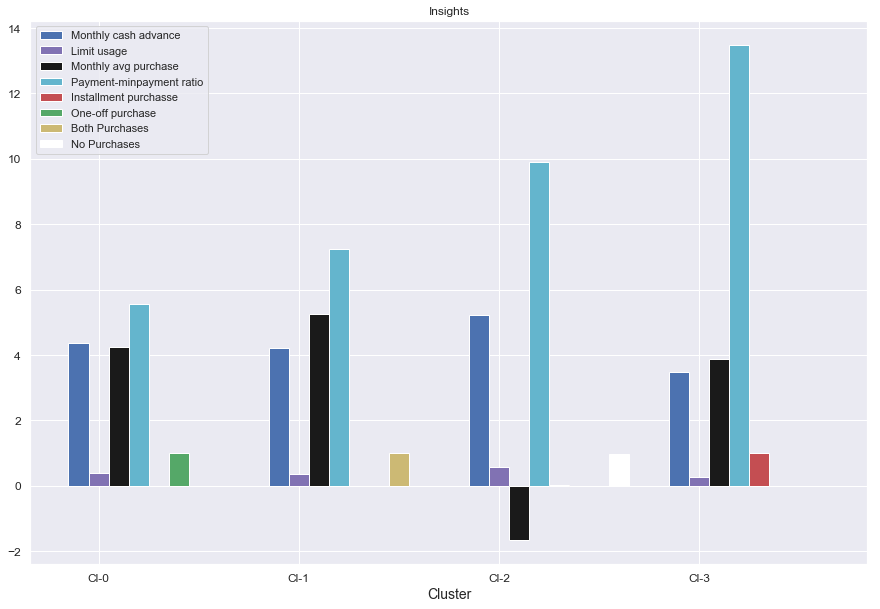

In [113]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

Monthly_cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
limit_usage=(cluster_4.loc['limit_usage',:].values)
Monthly_avg_purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment_minpayment_ratio=cluster_4.loc['payment_minpayment_ratio',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values
both_oneoff_installment=cluster_4.loc['both_oneoff_installment',:].values
none=cluster_4.loc['none',:].values


bar_width=.10
b1=plt.bar(index,Monthly_cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,limit_usage,color='m',label='Limit usage',width=bar_width)
b3=plt.bar(index+2*bar_width,Monthly_avg_purchase,color='k',label='Monthly avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment_minpayment_ratio,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='Installment purchasse',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One-off purchase',width=bar_width)
b7=plt.bar(index+6*bar_width,both_oneoff_installment,color='y',label='Both Purchases',width=bar_width)
b7=plt.bar(index+7*bar_width,none,color='w',label='No Purchases',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [114]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    1870
1          1    2764
2          2    2101
3          3    2215
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  1870   20.893855
1  2764   30.882682
2  2101   23.474860
3  2215   24.748603


#### Customers from cluster 0 : They're taking the high advance cash from their card & doing only one-off purchases. Their average purchase using this credit card is medium, they're spending less amount & are not paying their dues in time. They consist of approximately 21 % of total customers.

#### Customers from cluster 1 : They're taking the medium amount of advance cash from their card & doing both type of purchases. Their average purchase is highest among groups. They're spending high amount but they're making comparatively less minimum payments.They consist of approximately 31 % of total customers.

#### Customers from cluster 2 : They're taking highest amount of advance cash from their card & aren't doing any purchases. They're spending least amount on their card & are paying their dues in time. They consist of approximately 23 % of total customers

#### Customers from cluster 3 : They're taking the least amount of advance cash from their card & doing only instalment purchases. They're doing medium amount of purchase. They're spending highest amount on their card & are making highest minimum payments compared to others. They consist of approximately 25 % of total customers